### Graph Name: Fraction Difference between EADAM and GS
### Description:
This graph gives the average number of changes between GS and EADAM for various n, k. The average is taken over 100 trials. The fraction difference is defined as the number of changes across the two sets of matchings divided by the number of matches. 


#### Simulation Code: 
Should only run this if you want to generate new data. Otherwise, skip to the next section to load the data. If you do, just uncomment section below. 

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/v-kirdwivedi/Documents/GitHub/MatchingAlgorithm/')
from multi_funcs import *
from funcs import *


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ks = [7,8]
ns = [1000, 2000, 3000, 4000]

In [6]:
for k in ks:
    for n in ns:
        results = f_simulate_MM_EA_GS(1000, n, k)
        df = make_df_max_match_length(n, k, results, save=True)

In [6]:
for n in ns:
    results = f_simulate_MM_EA_GS(10000, n, 3)
    df = make_df_max_match_length(n, 3, results, save=True)

In [7]:
def s_simulate_MM_EA_GS(item):
    n, k = item
    t1 = time.time()
    df = create_array(n,k)
    t2 = time.time()
    print('Time to create array: ', t2-t1)
    preferences = df.copy()
    _, GS_result, _, _, eadam_results = EADAM(df, k)
    t3 = time.time()
    print('Time to run EADAM: ', t3-t2)
    n_changes, n_matches, x1, x2 = get_max_weight_matching(preferences, GS_result, n, k, EADAM = False)
    t4 = time.time()
    print('Time to run MM: ', t4-t3)
    cycle_lengths, _ = len_cycles(x1, x2)
    t5 = time.time()
    print('Time to get cycle lengths: ', t5-t4)
    percent_lengths = [item/n_matches for item in cycle_lengths]
    eadam_results[0] = eadam_results[0].astype(str)+'S'
    x3 = set(zip(eadam_results[0], eadam_results['student_id']))
    GS_result[0] = GS_result[0].astype(str)+'S'
    x4 = set(zip(GS_result[0], GS_result['student_id']))
    t6 = time.time()
    cycle_lengths1, _ = len_cycles(x4, x3)
    t7 = time.time()
    print('Time to get Eadam cycle lengths: ', t7-t6)
    percent_lengths1 = [item/n_matches for item in cycle_lengths1]
    return cycle_lengths, percent_lengths, cycle_lengths1, percent_lengths1

### Graphs (for EADAM)

In [18]:
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [32]:
def prep(k, n):
    df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_length_diff_eadam.csv')
    df = df.sort_values(by=['cycle_lengths_eadam']).reset_index(drop=True)
    df = df.iloc[:-10, :]
    nbins = 5*k
    if k == 3:
        nbins = 8
    df['binned'] = pd.cut(df['cycle_lengths_eadam'], bins = nbins)
    df['binned'] = df["binned"].apply(lambda x: x.mid)
    grouped = df.groupby('binned').size()/len(df)
    x = pd.DataFrame(grouped).reset_index(drop=False)
    x['log'] = np.log(x[0])
    return x

In [36]:
def prep2(k, n):
    df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_length_diff.csv')
    df = df.sort_values(by=['cycle_lengths']).reset_index(drop=True)
    df = df.iloc[:-10, :]
    nbins = 5*k
    if k == 3:
        nbins = 8
    df['binned'] = pd.cut(df['cycle_lengths'], bins = nbins)
    df['binned'] = df["binned"].apply(lambda x: x.mid)
    grouped = df.groupby('binned').size()/len(df)
    x = pd.DataFrame(grouped).reset_index(drop=False)
    x['log'] = np.log(x[0])
    return x

In [37]:
from scipy import stats

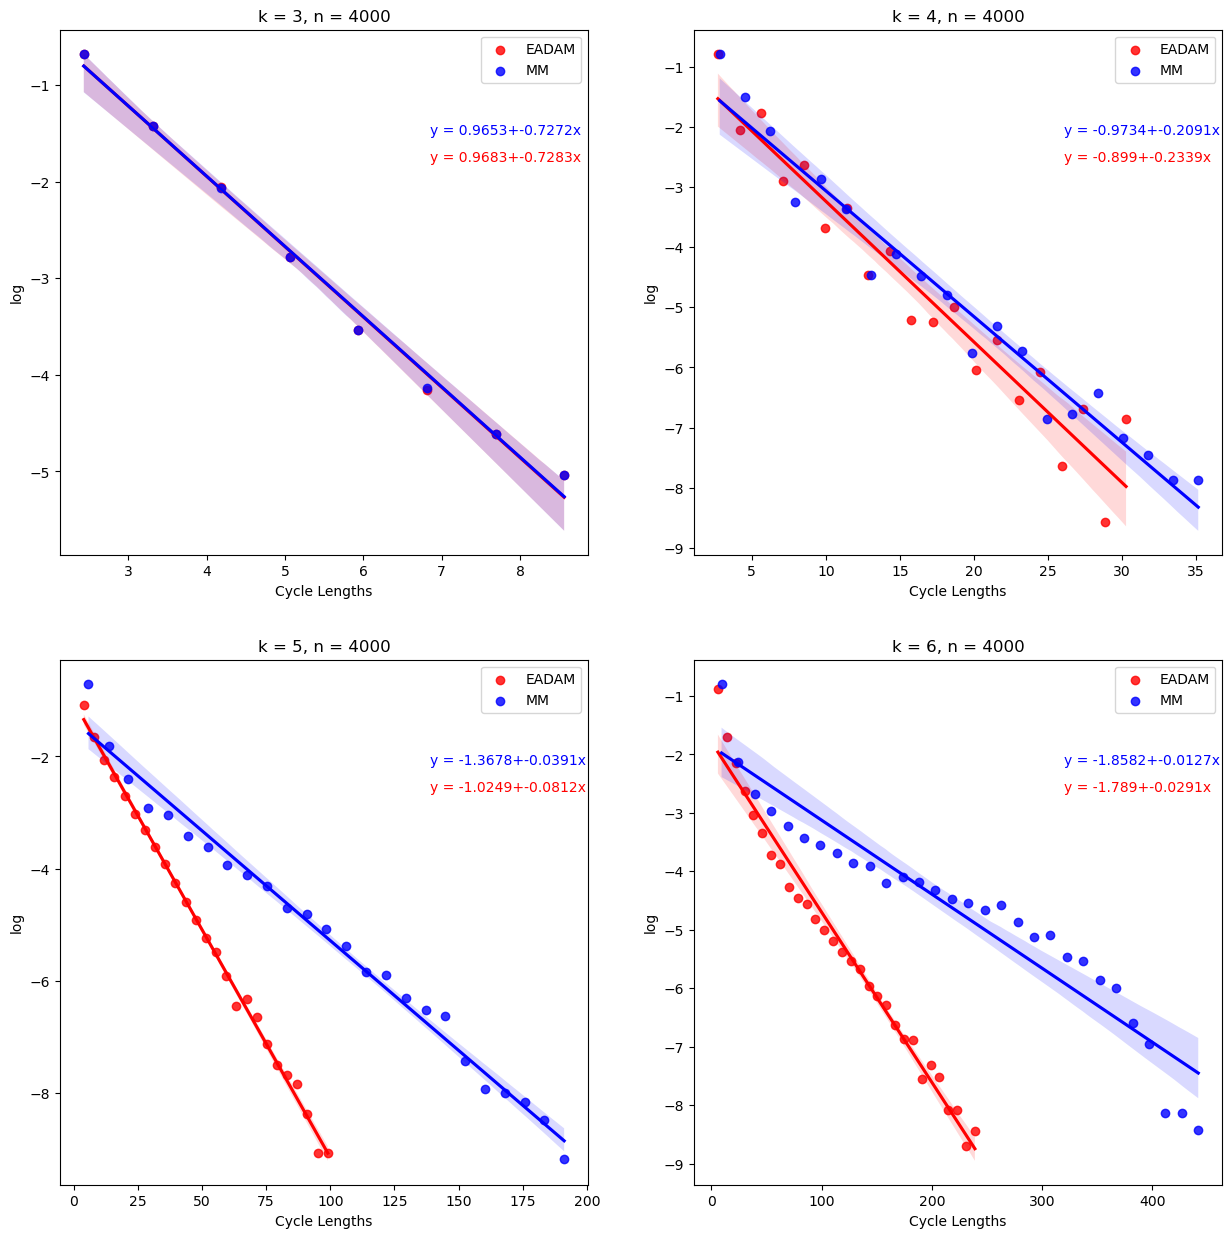

In [51]:
n = 4000
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

df = prep(3, n)
sns.regplot(x='binned', y='log', data=df, ax=ax[0, 0], color='red', label='EADAM')
res1 = stats.linregress(x=df['binned'], y=df['log'])
ax[0, 0].text(0.7, 0.75, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=ax[0,0].transAxes, color = 'red')

df2 = prep2(3, n)
sns.regplot(x='binned', y='log', data=df2, ax=ax[0, 0], color='blue', label='MM')
res2 = stats.linregress(x=df2['binned'], y=df2['log'])
ax[0, 0].text(0.7, 0.8, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[0,0].transAxes, color='blue')

ax[0,0].set_title(f'k = 3, n = {n}')
ax[0,0].set_xlabel('Cycle Lengths')
ax[0,0].legend()



df = prep(4, n)
sns.regplot(x='binned', y='log', data=df, ax=ax[0, 1], color = 'red', label = 'EADAM')
res2 = stats.linregress(x=df['binned'], y=df['log'])
ax[0, 1].text(0.7, 0.75, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[0,1].transAxes, color = 'red')

df2 = prep2(4, n)
sns.regplot(x='binned', y='log', data=df2, ax=ax[0, 1], color = 'blue', label='MM')
res2 = stats.linregress(x=df2['binned'], y=df2['log'])
ax[0, 1].text(0.7, 0.8, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[0,1].transAxes, color='blue')
ax[0,1].set_title(f'k = 4, n = {n}')
ax[0,1].set_xlabel('Cycle Lengths')
ax[0,1].legend()


df = prep(5, n)
sns.regplot(x='binned', y='log', data=df, ax=ax[1, 0], color='red', label='EADAM')
res1 = stats.linregress(x=df['binned'], y=df['log'])
ax[1, 0].text(0.7, 0.75, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=ax[1,0].transAxes, color = 'red')

df2 = prep2(5, n)
sns.regplot(x='binned', y='log', data=df2, ax=ax[1, 0], color='blue', label='MM')
res2 = stats.linregress(x=df2['binned'], y=df2['log'])
ax[1, 0].text(0.7, 0.8, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[1,0].transAxes, color='blue')


ax[1,0].set_title(f'k = 5, n = {n}')
ax[1,0].set_xlabel('Cycle Lengths')
ax[1,0].legend()


df = prep(6, n)
sns.regplot(x='binned', y='log', data=df, ax=ax[1, 1], color = 'red', label='EADAM')
res2 = stats.linregress(x=df['binned'], y=df['log'])
ax[1, 1].text(0.7, 0.75, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[1,1].transAxes, color = 'red')

df2 = prep2(6, n)
sns.regplot(x='binned', y='log', data=df2, ax=ax[1, 1], color = 'blue', label='MM')
res2 = stats.linregress(x=df2['binned'], y=df2['log'])
ax[1, 1].text(0.7, 0.8, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[1,1].transAxes, color='blue')

ax[1,1].set_title(f'k = 6, n = {n}')
ax[1,1].set_xlabel('Cycle Lengths')
ax[1,1].legend()

